In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("voiceDataSet.csv")

In [3]:
data.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

meanfreq: средняя частота голоса (в кГц)  
sd: стандартное отклонение частоты голоса  
median: медианная частота (в кГц)  
Q25: значение в первом квартиле (в кГц)  
Q75: значение в третьем квартиле (в кГц)  
IQR: интерквартильный размах (в кГц)  
skew: ассиметрия  
kurt: эксцесс  
sp.ent: спектральная энтропия  
sfm: энтропия Винера  
mode: мода частоты  
centroid: частотный центроид  
meanfun: средняя основная частота, измеренная по акустическому сигналу  
minfun:  минимальная основная частота, измеренная по акустическому сигналу  
maxfun: максимальная основная частота, измеренная в акустическом сигнале  
meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу  
mindom: минимум доминирующей частоты, измеренной в акустическом сигнале  
maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале  
dfrange: диапазон доминантных частот, измеренное на звуковой сигнал  
modindx: индекс модуляции голоса

In [6]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

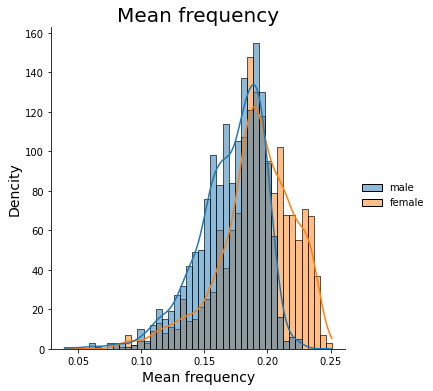

In [51]:
# Прежде, чем проводить анализ, можно с помощью визуализации оценить,
# есть ли различия в частотах голосов мужчин и женщин.
# Можем построить распределения, например, средних частот:

sns.displot(
    {
        "male" : data[data.label=='male'].meanfreq,
        "female" : data[data.label=='female'].meanfreq
    },
    kde = True,
    )
plt.title('Mean frequency', fontsize=20)
plt.xlabel('Mean frequency', fontsize=14)
plt.ylabel('Dencity', fontsize=14)
plt.show()

Задание
Попробуйте построить модель, предсказывающую пол обладателя записи голоса.

Для этого:

Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42.

Нормализуйте признаки с помощью функции StandardScaler(). Учитывайте, что нормализация тестовой выборки производится по среднему и отклонению тренировочной, которую мы считаем репрезентативной относительно генеральной совокупности.

Обучите модель логистической регрессии на подготовленных данных.

Пояснение
Тестовые данные не должны влиять на параметры нормализации. Нужно использовать SCALER.TRANSFORM вместо SCALER.FIT_TRANSFORM, чтобы применять параметры нормализации, рассчитанные для тренировочных данных. Иначе данные в трейне и в тесте будут нормализованы по - разному.

In [67]:
X = data.drop('label', axis = 1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_norm, y_train)
y_pred = lr.predict(X_test_norm)
accuracy_score(y_test, y_pred)

0.9726603575184016

In [68]:
X = data.drop('label', axis = 1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_norm = scaler.transform(X_train)
#X_test_norm = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.900105152471083

In [69]:
data = pd.read_csv('glass.csv')
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [73]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


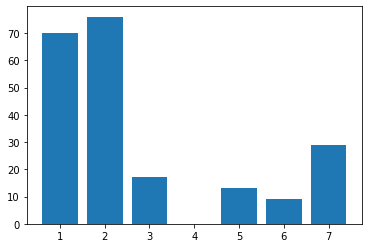

In [99]:
print(data.Type.value_counts())
plt.bar(data.Type.unique(), data.Type.value_counts().sort_index())
plt.show()

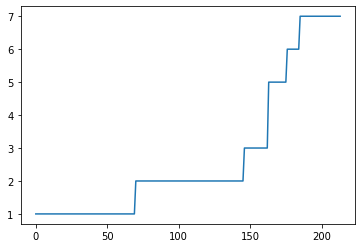

In [131]:
plt.plot(data.Type)

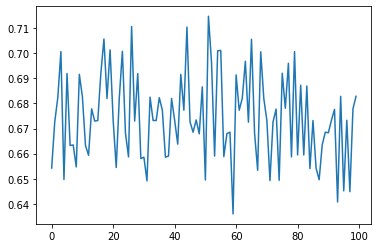

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

X = data.drop('Type', axis=1)
y = data.Type

model = KNeighborsClassifier(n_neighbors=3)
n_iters = 100
mean_acc = []
for _ in range(n_iters):
    kf = KFold(n_splits=5, shuffle=True)
    res = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    mean_acc.append(np.mean(res))

plt.plot(mean_acc)

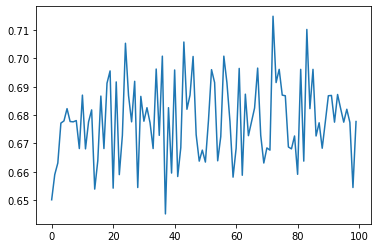

In [154]:
model = KNeighborsClassifier(n_neighbors=3)
n_iters = 100
mean_acc = []
for _ in range(n_iters):
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    res = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    mean_acc.append(np.mean(res))
    
plt.plot(mean_acc)

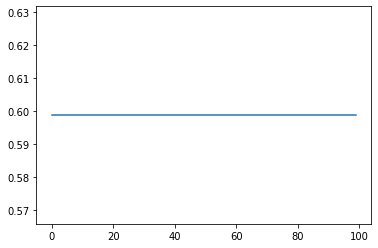

In [149]:
model = KNeighborsClassifier(n_neighbors=3)
n_iters = 100
mean_acc = []
for _ in range(n_iters):
    res = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_acc.append(np.mean(res))
    
plt.plot(mean_acc)

In [156]:
kf = KFold(n_splits=10)
res = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
np.mean(res)

0.5257575757575758

In [158]:
data = pd.read_csv('heart_fin1.csv', sep=';')
data.tail()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,1.2,0
300,68,1,0,144,193,1,141,0,3.4,0
301,57,1,0,130,131,1,115,1,1.2,0
302,57,0,1,130,236,0,174,0,0.0,0


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   target    303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [160]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [163]:
data.target.unique()

array([1, 0], dtype=int64)

In [164]:
data.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,1.000000


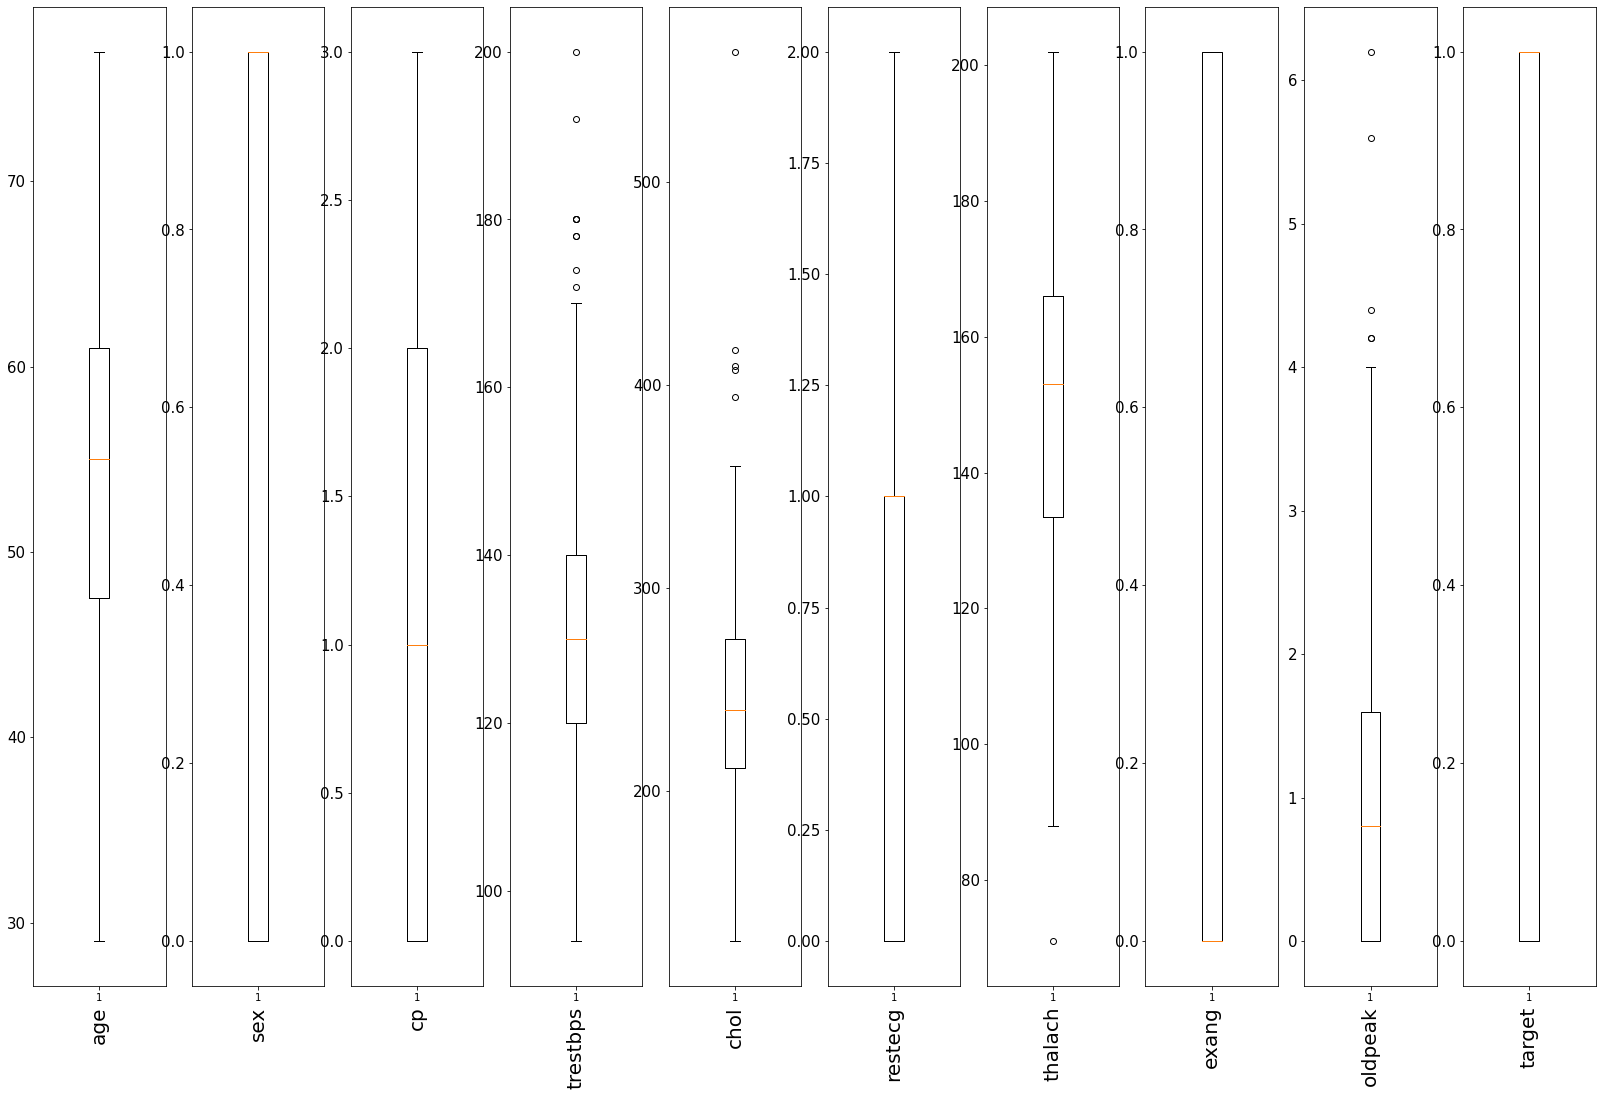

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=data.shape[1], figsize=(28,18))
for i, ax in enumerate(axes.flat):
    ax.boxplot(data.iloc[:,i])
    ax.set_xlabel(data.columns[i], rotation=90, fontsize=20)
    ax.tick_params(axis='y', labelsize=15)
plt.show()   

In [ ]:
data

In [236]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
idx = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_clean = data.loc[idx]
data_clean.shape

(284, 10)

In [237]:
data[~idx]

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
8,52,1,2,172,199,1,162,0,0.5,1
28,65,0,2,140,417,0,157,0,0.8,1
85,67,0,2,115,564,0,160,0,1.6,1
96,62,0,0,140,394,0,157,0,1.2,1
101,59,1,3,178,270,0,145,0,4.2,1
110,64,0,0,180,325,1,154,1,0.0,1
203,68,1,2,180,274,0,150,1,1.6,0
204,62,0,0,160,164,0,145,0,6.2,0
220,63,0,0,150,407,0,154,0,4.0,0
221,55,1,0,140,217,1,111,1,5.6,0


In [256]:
data[~idx].shape

(19, 10)

In [209]:
data.shape

(303, 10)

In [277]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = data_clean.drop('target', axis=1)
y = np.array(data_clean['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_test)[:,1]
print(f"ROC AUC Logistic rergession: {roc_auc_score(y_test, y_pred_lr):.2f}")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict_proba(X_test)[:,1]
print(f"ROC AUC K-Neighbors: {roc_auc_score(y_test, y_pred_knn):.2f}")

ROC AUC Logistic rergession: 0.82
ROC AUC K-Neighbors: 0.65


In [284]:
pd.Series(lr.predict(X_test))

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    1
17    1
18    1
19    0
20    0
21    1
22    0
23    1
24    0
25    1
26    0
27    0
28    1
29    0
30    1
31    1
32    0
33    0
34    1
35    0
36    1
37    0
38    0
39    1
40    1
41    1
42    1
dtype: int64